In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical

ModuleNotFoundError: No module named 'sklearn'

## Data Preprocessing

In [3]:
import pandas as pd
file_path = '/Users/macbookpro/Documents/ali/codingnow/backend/eatRight/dataset/obesity classification/ObesityDataSet_raw_and_data_sinthetic.csv'
data = pd.read_csv(file_path)

# Encode categorical variables
categorical_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Normalize continuous variables
continuous_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
scaler = StandardScaler()
data[continuous_columns] = scaler.fit_transform(data[continuous_columns])


In [4]:
# Separate features and target variable
X = data.drop(columns=['NObeyesdad'])
y = data['NObeyesdad']

In [5]:
# Convert target variable to categorical (multi-class classification)
y = to_categorical(y)

In [6]:
# Split into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [7]:
# Build the Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(y_train.shape[1], activation='softmax')  # Output layer with softmax for multi-class classification
])

/Users/qhiyn/bangkit/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-11-15 00:04:03.467707: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-11-15 00:04:03.467807: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-11-15 00:04:03.467829: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-11-15 00:04:03.468203: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-15 00:04:03.468276: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created Tensor

In [8]:
# Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
# Train the Model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50


2024-11-15 00:04:06.740083: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - accuracy: 0.1998 - loss: 2.4918 - val_accuracy: 0.4006 - val_loss: 1.7204
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.3998 - loss: 1.6530 - val_accuracy: 0.4164 - val_loss: 1.5464
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.4928 - loss: 1.4235 - val_accuracy: 0.5268 - val_loss: 1.3081
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.5239 - loss: 1.2763 - val_accuracy: 0.6467 - val_loss: 1.0635
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.5640 - loss: 1.1518 - val_accuracy: 0.7035 - val_loss: 0.8789
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.5923 - loss: 1.0398 - val_accuracy: 0.7382 - val_loss: 0.7524
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.6031 - loss: 0.9992 - val_accuracy: 0.7508 - val_loss: 0.6741
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.6532 - loss: 0.8896 - val_accuracy: 0.7950 - val_loss: 0.

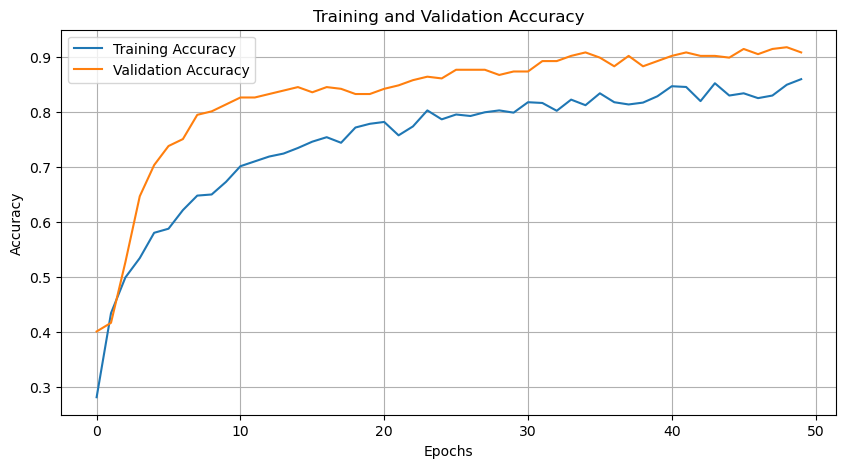

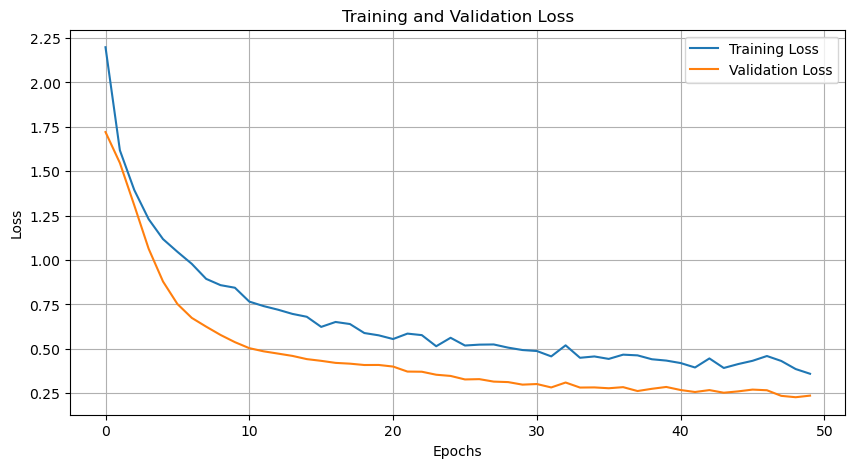

In [10]:
import matplotlib.pyplot as plt

def plot_training_results(history):
    """
    Plots the training and validation accuracy and loss curves.
    :param history: Training history object returned by model.fit()
    """
    # Plot training and validation accuracy
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot training and validation loss
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the function with your history object
plot_training_results(history)

In [11]:
# Evaluate the Model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Test Loss: 0.23580564558506012
Test Accuracy: 0.9242902398109436


In [12]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Get predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Classification report
print(classification_report(y_true_classes, y_pred_classes))

# Confusion matrix
print(confusion_matrix(y_true_classes, y_pred_classes))

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        50
           1       0.88      0.80      0.83        44
           2       0.96      0.94      0.95        47
           3       0.96      1.00      0.98        51
           4       1.00      1.00      1.00        45
           5       0.81      0.85      0.83        34
           6       0.97      0.85      0.91        46

    accuracy                           0.92       317
   macro avg       0.92      0.92      0.92       317
weighted avg       0.93      0.92      0.92       317

[[50  0  0  0  0  0  0]
 [ 7 35  0  0  0  2  0]
 [ 0  0 44  2  0  0  1]
 [ 0  0  0 51  0  0  0]
 [ 0  0  0  0 45  0  0]
 [ 0  5  0  0  0 29  0]
 [ 0  0  2  0  0  5 39]]


In [13]:
model.save("obesity_prediction_model.h5")